# Topic extraction From Speech

In [ ]:
!pip install nltk
!pip install genism
!nltk.download()

ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
ps = PorterStemmer()
wordnet=WordNetLemmatizer()

In [ ]:
path = "https://raw.githubusercontent.com/HarshaDevulapalli/indian-pm-speeches/master/narendramodi/0_15_Aug_2014_PMs_address_to_the_Nation_from_the_ramparts_of_the_Red_Fort_on_the_68th_Independence_Day_.txt"
# file=open(path,'r',encoding="utf8")
# paragraph=file.read()
# file.close()
# print(paragraph)

import requests
paragraph = requests.get(path)
paragraph = paragraph.text
print(paragraph)

Prime Minister Shri Narendra Modi addressed the Nation from the ramparts of the Red Fort on the 68th Independence Day.Following is the English rendering of the Prime Ministerâs address on the occasion:-My dear countrymen,Today, all Indians in the country and also abroad are celebrating the festival of independence. On this day of sacred festival of independence, the prime servant of India extends greetings to all dear countrymen.I am present amidst you not as the Prime Minister, but as the Prime Servant. The freedom struggle was fought for so many years, so many generations laid down their lives, innumerable people sacrificed their lives and youth, spent their entire lives behind bars. Today, I pay my respect, greetings and homage to all those who laid their lives for the country`s independence.I also pay my respects to the crores of citizens of this country on the pious occasion of India`s independence, and recall all those martyrs who had laid down their lives in India`s struggle f

In [ ]:
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(sentences[1],'::',corpus[1])

On this day of sacred festival of independence, the prime servant of India extends greetings to all dear countrymen.I am present amidst you not as the Prime Minister, but as the Prime Servant. :: day sacred festival independence prime servant india extends greeting dear countryman present amidst prime minister prime servant


In [ ]:
st=""
for sentence in corpus:
    st=st+sentence
tokens=st.split()
a=Counter(tokens)
d=a.most_common(20)
print(d)

[('country', 60), ('india', 54), ('sister', 45), ('brother', 34), ('government', 34), ('world', 32), ('one', 26), ('also', 21), ('move', 21), ('people', 20), ('take', 20), ('today', 17), ('forward', 17), ('come', 17), ('want', 17), ('nation', 16), ('new', 16), ('prime', 15), ('countryman', 15), ('u', 15)]


In [ ]:
a = 'On this day of sacred festival of of independence'
a = a.split()
Counter(a)

Counter({'On': 1,
         'day': 1,
         'festival': 1,
         'independence': 1,
         'of': 3,
         'sacred': 1,
         'this': 1})

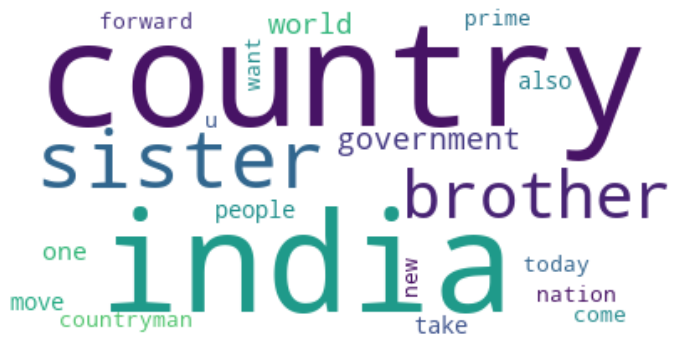

In [ ]:
# The following code has implemented a beautiful word cloud of the 20 most frequent words in the speech.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dic={}
for row in d:
    dic[row[0]]=row[1]
word_freq=dic
#Generate word cloud
wc = WordCloud(width=400, height=200, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataset = [d.split() for d in corpus]
model = Word2Vec(dataset, min_count=1)
words =list(model.wv.index2entity)
# words =list(model.wv. index_to_key)
vector = model.wv['india']
similar = model.wv.most_similar('india')
print(similar)

[('devotion', 0.3732963502407074), ('saint', 0.3467431366443634), ('replace', 0.3194119334220886), ('beautiful', 0.29589179158210754), ('run', 0.2882821559906006), ('derived', 0.27468177676200867), ('one', 0.2709047198295593), ('criticised', 0.26326262950897217), ('broadened', 0.26244011521339417), ('moving', 0.26231086254119873)]


In [ ]:
dictionary = gensim.corpora.Dictionary(dataset)
dictionary.filter_extremes(no_below=10, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in dataset]

In [ ]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                    id2word = dictionary,                                    
                                    passes = 50,
                                    workers = 2,
                                    alpha=0.5,
                                     eta=0.5)
print(lda_model)

LdaModel(num_terms=45, num_topics=5, decay=0.5, chunksize=2000)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} nWords: {}".format(idx, topic ))
    print("n")

Topic: 0 nWords: 0.225*"people" + 0.195*"also" + 0.111*"time" + 0.111*"life" + 0.101*"work" + 0.074*"freedom" + 0.009*"today" + 0.009*"way" + 0.008*"poor" + 0.007*"give"
n
Topic: 1 nWords: 0.131*"forward" + 0.125*"take" + 0.092*"nation" + 0.089*"good" + 0.083*"countryman" + 0.079*"prime" + 0.074*"minister" + 0.073*"move" + 0.055*"way" + 0.045*"dear"
n
Topic: 2 nWords: 0.165*"world" + 0.100*"want" + 0.092*"u" + 0.072*"youth" + 0.066*"let" + 0.059*"therefore" + 0.059*"would" + 0.055*"power" + 0.055*"dream" + 0.046*"direction"
n
Topic: 3 nWords: 0.269*"one" + 0.144*"whether" + 0.118*"year" + 0.108*"resolve" + 0.103*"th" + 0.028*"dream" + 0.023*"today" + 0.013*"direction" + 0.009*"welfare" + 0.008*"village"
n
Topic: 4 nWords: 0.109*"village" + 0.107*"today" + 0.103*"come" + 0.084*"mother" + 0.079*"make" + 0.070*"member" + 0.065*"poor" + 0.065*"parliament" + 0.065*"parent" + 0.060*"say"
n
